In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'country_vaccinations.csv'
df = pd.read_csv(path)
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...
9985,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...
9986,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...
9987,Zimbabwe,ZWE,2021-04-02,124753.0,103815.0,20938.0,19446.0,8156.0,0.84,0.70,0.14,549.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378425187...


## Let's explore our data to to find the relevant columns for our Analysis.

In [3]:
# Looking for null values
df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3953
people_vaccinated                      4577
people_fully_vaccinated                6171
daily_vaccinations_raw                 4935
daily_vaccinations                      183
total_vaccinations_per_hundred         3953
people_vaccinated_per_hundred          4577
people_fully_vaccinated_per_hundred    6171
daily_vaccinations_per_million          183
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [4]:
# Exploring the source column
df['source_name'].unique()

array(['Government of Afghanistan', 'Ministry of Health',
       'Government of Andorra',
       'Government of Australia via covidlive.com.au',
       'Government of Azerbaijan', 'Government of the Bahamas',
       'Directorate General of Health Services', 'Sciensano',
       'Government of Bermuda',
       'Official data from provinces via covid19tracker.ca',
       'Government of Cape Verde', 'Cayman Islands Government',
       'Department of Statistics and Health Information',
       'National Health Commission',
       'Ministry of Health via Universidad de La Sabana',
       'Costa Rican Social Security Fund',
       'Ministry of Health and Public Hygiene', 'Government of Cyprus',
       'Statens Serum Institut', 'Government of Dominica',
       'Ministry of Public Health', 'Government of Ecuador via Ecuacovid',
       'Government of the United Kingdom', 'National Health Board',
       'Government of the Faeroe Islands',
       'Government of the Falkland Islands',
       'Finnis

In [5]:
df['source_name'].value_counts()

Ministry of Health                                    3273
Government of the United Kingdom                       565
Ministry of Public Health                              151
Federal Office of Public Health                        125
Official data from provinces via covid19tracker.ca     113
                                                      ... 
Government of Togo                                      16
Taiwan Centers for Disease Control                      16
Government of Cape Verde                                 7
Government of the Bahamas                                2
Government of Laos                                       1
Name: source_name, Length: 98, dtype: int64

There are as many sources reporting vaccinations as countries. This column could be dropped eventually.

In [6]:
# Let's sort our date column to see the range period for the vaccination.
df.sort_values(by='date', inplace=True)

In [7]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2724,England,OWID_ENG,2020-12-13,55576.0,55576.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
9500,United Kingdom,GBR,2020-12-13,86465.0,86465.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
6611,Northern Ireland,OWID_NIR,2020-12-13,3623.0,3623.0,NaN,NaN,NaN,0.19,0.19,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
8019,Scotland,OWID_SCT,2020-12-13,19009.0,19009.0,NaN,NaN,NaN,0.35,0.35,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
9831,Wales,OWID_WLS,2020-12-13,8257.0,8257.0,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Oman,OMN,2021-04-05,171055.0,152036.0,19019.0,NaN,4451.0,3.35,2.98,0.37,872.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://twitter.com/OmaniMOH/status/1378992177...
8636,Slovenia,SVN,2021-04-05,403815.0,285048.0,118767.0,0.0,8173.0,19.42,13.71,5.71,3931.0,"Oxford/AstraZeneca, Pfizer/BioNTech",National Institute of Public Health,https://www.cepimose.si/
1313,Brazil,BRA,2021-04-05,21960953.0,17128933.0,4832020.0,890825.0,554114.0,10.33,8.06,2.27,2607.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://viz.saude.gov.br/extensions/DEMAS_C19V...
743,Bahrain,BHR,2021-04-05,836788.0,534356.0,302432.0,19409.0,12826.0,49.18,31.40,17.77,7538.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/


Last vaccination records in our data are from April 5, 2021

In [8]:
df['iso_code'].unique()

array(['OWID_ENG', 'GBR', 'OWID_NIR', 'OWID_SCT', 'OWID_WLS', 'CAN',
       'CHN', 'RUS', 'ISR', 'USA', 'QAT', 'BHR', 'CHL', 'CRI', 'MEX',
       'CYM', 'SVN', 'NOR', 'DEU', 'PRT', 'CZE', 'ROU', 'AUT', 'ITA',
       'DNK', 'FRA', 'SWE', 'LTU', 'EST', 'BEL', 'HUN', 'BLR', 'KWT',
       'POL', 'LVA', 'OMN', 'GRC', 'ARG', 'BGR', 'ISL', 'HRV', 'LUX',
       'MCO', 'IRL', 'FIN', 'ESP', 'SVK', 'ARE', 'SAU', 'CYP', 'SRB',
       'SYC', 'BMU', 'ALB', 'GIB', 'TCA', 'SGP', 'JOR', 'IDN', 'TUR',
       'OWID_CYN', 'IND', 'BRA', 'NLD', 'MLT', 'AZE', 'PAN', 'ECU', 'IMN',
       'GGY', 'EGY', 'JEY', 'CHE', 'MUS', 'AND', 'BGD', 'NPL', 'MMR',
       'GRL', 'LKA', 'BOL', 'MAR', 'DZA', 'FRO', 'KAZ', 'MDV', 'PAK',
       'LIE', 'SHN', 'AIA', 'FLK', 'IRN', 'MAC', 'MSR', 'PER', 'KHM',
       'DMA', 'GUY', 'GRD', 'LBN', 'AUS', 'BRB', 'TTO', 'RWA', 'DOM',
       'ATG', 'MKD', 'ZAF', 'LCA', 'VEN', 'JPN', 'COL', 'SLV', 'NZL',
       'ZWE', 'MNE', 'PRY', 'SEN', 'SUR', 'KNA', 'AFG', 'HKG', 'MNG',
       'MYS', 'U

In [9]:
# Let's drop iso_code since we already have the country names
df.drop('iso_code', axis=1, inplace=True)

In [10]:
df[:5]

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2724,England,2020-12-13,55576.0,55576.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
9500,United Kingdom,2020-12-13,86465.0,86465.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
6611,Northern Ireland,2020-12-13,3623.0,3623.0,NaN,NaN,NaN,0.19,0.19,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
8019,Scotland,2020-12-13,19009.0,19009.0,NaN,NaN,NaN,0.35,0.35,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
9831,Wales,2020-12-13,8257.0,8257.0,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [11]:
# As mentioned above, we will drop the source columns, they are not needed right now for evaluating
# the vaccination progress.
df.drop(['source_name', 'source_website'], axis=1, inplace=True)
df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
2724,England,2020-12-13,55576.0,55576.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech"
9500,United Kingdom,2020-12-13,86465.0,86465.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech"
6611,Northern Ireland,2020-12-13,3623.0,3623.0,NaN,NaN,NaN,0.19,0.19,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech"
8019,Scotland,2020-12-13,19009.0,19009.0,NaN,NaN,NaN,0.35,0.35,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech"
9831,Wales,2020-12-13,8257.0,8257.0,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Oman,2021-04-05,171055.0,152036.0,19019.0,NaN,4451.0,3.35,2.98,0.37,872.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
8636,Slovenia,2021-04-05,403815.0,285048.0,118767.0,0.0,8173.0,19.42,13.71,5.71,3931.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1313,Brazil,2021-04-05,21960953.0,17128933.0,4832020.0,890825.0,554114.0,10.33,8.06,2.27,2607.0,"Oxford/AstraZeneca, Sinovac"
743,Bahrain,2021-04-05,836788.0,534356.0,302432.0,19409.0,12826.0,49.18,31.40,17.77,7538.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


Replacing the null values with zero.

In [12]:
df.fillna(0, inplace=True)
df

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
2724,England,2020-12-13,55576.0,55576.0,0.0,0.0,0.0,0.10,0.10,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
9500,United Kingdom,2020-12-13,86465.0,86465.0,0.0,0.0,0.0,0.13,0.13,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
6611,Northern Ireland,2020-12-13,3623.0,3623.0,0.0,0.0,0.0,0.19,0.19,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
8019,Scotland,2020-12-13,19009.0,19009.0,0.0,0.0,0.0,0.35,0.35,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
9831,Wales,2020-12-13,8257.0,8257.0,0.0,0.0,0.0,0.26,0.26,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...
6921,Oman,2021-04-05,171055.0,152036.0,19019.0,0.0,4451.0,3.35,2.98,0.37,872.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
8636,Slovenia,2021-04-05,403815.0,285048.0,118767.0,0.0,8173.0,19.42,13.71,5.71,3931.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1313,Brazil,2021-04-05,21960953.0,17128933.0,4832020.0,890825.0,554114.0,10.33,8.06,2.27,2607.0,"Oxford/AstraZeneca, Sinovac"
743,Bahrain,2021-04-05,836788.0,534356.0,302432.0,19409.0,12826.0,49.18,31.40,17.77,7538.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


In [13]:
# Checking the columns with null values in our data.
df.isnull().sum()

country                                0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
dtype: int64

No columns with null values

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 2724 to 1413
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              9989 non-null   object 
 1   date                                 9989 non-null   object 
 2   total_vaccinations                   9989 non-null   float64
 3   people_vaccinated                    9989 non-null   float64
 4   people_fully_vaccinated              9989 non-null   float64
 5   daily_vaccinations_raw               9989 non-null   float64
 6   daily_vaccinations                   9989 non-null   float64
 7   total_vaccinations_per_hundred       9989 non-null   float64
 8   people_vaccinated_per_hundred        9989 non-null   float64
 9   people_fully_vaccinated_per_hundred  9989 non-null   float64
 10  daily_vaccinations_per_million       9989 non-null   float64
 11  vaccines                   

Our date column is an object and need to be converted to type date for our analysis.

In [15]:
df1 = df.copy()

In [16]:
df1['date'] = pd.to_datetime(df['date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 2724 to 1413
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              9989 non-null   object        
 1   date                                 9989 non-null   datetime64[ns]
 2   total_vaccinations                   9989 non-null   float64       
 3   people_vaccinated                    9989 non-null   float64       
 4   people_fully_vaccinated              9989 non-null   float64       
 5   daily_vaccinations_raw               9989 non-null   float64       
 6   daily_vaccinations                   9989 non-null   float64       
 7   total_vaccinations_per_hundred       9989 non-null   float64       
 8   people_vaccinated_per_hundred        9989 non-null   float64       
 9   people_fully_vaccinated_per_hundred  9989 non-null   float64       
 10  daily_vac

## Now that our data has no null values and the relevant columns have the type needed for our analysis, let's make some exploration of the vaccination progress since December 2020. For our purposes we will focus on the top 20 countries with the biggest number of daily vaccinations.

In [17]:
# Grouping and sorting the countries by daily vaccinations in descending order.
total_vac_by_country = df1.groupby('country')['daily_vaccinations'].sum().reset_index()
total_vac_by_country.sort_values(by='daily_vaccinations', ascending=False,
                                inplace=True)

Top 20 countries 

In [18]:
total_vac_by_country_top20 = total_vac_by_country[:20]
total_vac_by_country_top20.rename(columns={'daily_vaccinations': 'total_vaccinated'}, inplace=True)
total_vac_by_country_top20

,country,total_vaccinated
160,United States,157424562.0
29,China,129687785.0
66,India,73075331.0
159,United Kingdom,36175196.0
42,England,30433314.0
21,Brazil,20289917.0
154,Turkey,17003397.0
52,Germany,13644869.0
67,Indonesia,12004557.0
125,Russia,11746315.0


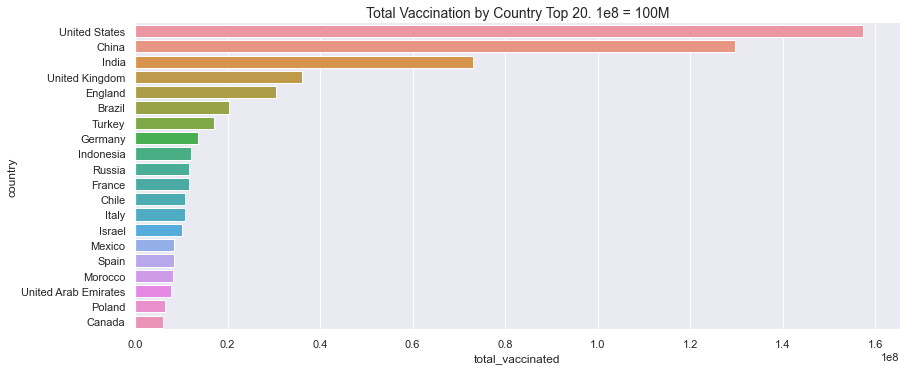

In [19]:
sns.catplot(y='country', x='total_vaccinated',
            data=total_vac_by_country_top20, kind='bar', height=5, aspect=2.5)
plt.title('Total Vaccination by Country Top 20. 1e8 = 100M', fontsize=14);

Let's see the progress in daily vaccination for the top 20 countries

In [20]:
top_20_countries = df1[df1['country'].isin(total_vac_by_country_top20['country'])]
top_20_countries

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
2724,England,2020-12-13,55576.0,55576.0,0.0,0.0,0.0,0.10,0.10,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
9500,United Kingdom,2020-12-13,86465.0,86465.0,0.0,0.0,0.0,0.13,0.13,0.00,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
2725,England,2020-12-14,0.0,0.0,0.0,0.0,74179.0,0.00,0.00,0.00,1318.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
1458,Canada,2020-12-14,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
9501,United Kingdom,2020-12-14,0.0,0.0,0.0,0.0,84117.0,0.00,0.00,0.00,1239.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
...,...,...,...,...,...,...,...,...,...,...,...,...
4751,Italy,2021-04-05,11252066.0,7770638.0,3481428.0,160628.0,219121.0,18.61,12.85,5.76,3624.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
1889,China,2021-04-05,142802000.0,0.0,0.0,2832000.0,4548571.0,9.92,0.00,0.00,3160.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
1777,Chile,2021-04-05,11060230.0,7017559.0,4042671.0,268597.0,162239.0,57.86,36.71,21.15,8487.0,"Pfizer/BioNTech, Sinovac"
1570,Canada,2021-04-05,6555389.0,5836927.0,718462.0,183279.0,179165.0,17.37,15.47,1.90,4747.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


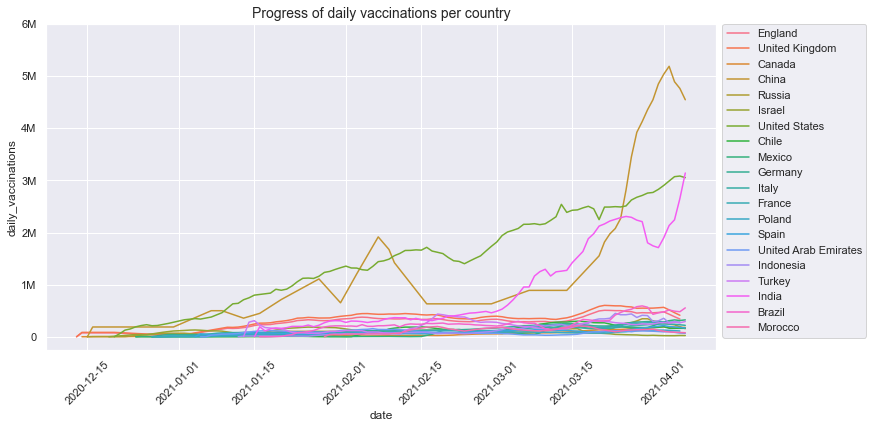

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='daily_vaccinations', data=top_20_countries, hue='country')
plt.title('Progress of daily vaccinations per country', fontsize=14)
plt.yticks(list(np.arange(0,6000001,1000000)),['0', '1M',
                                              '2M','3M', '4M', '5M', '6M']);
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0);

Looking for the daily average vaccination average by country.

In [22]:
avg_daily_vac_by_country = df1.groupby('country')['daily_vaccinations'].mean().reset_index()
avg_daily_vac_by_country.sort_values(by='daily_vaccinations', ascending=False,
                                inplace=True)

In [23]:
avg_daily_vac_by_country_top20 = avg_daily_vac_by_country[:20]
avg_daily_vac_by_country_top20.rename(columns={'daily_vaccinations': 'avg_daily_vacc'}, inplace=True)
avg_daily_vac_by_country_top20

,country,avg_daily_vacc
160,United States,1.471258e+06
29,China,1.157927e+06
66,India,9.021646e+05
159,United Kingdom,3.201345e+05
42,England,2.693214e+05
21,Brazil,2.536240e+05
154,Turkey,2.048602e+05
67,Indonesia,1.446332e+05
52,Germany,1.406688e+05
102,Morocco,1.216981e+05


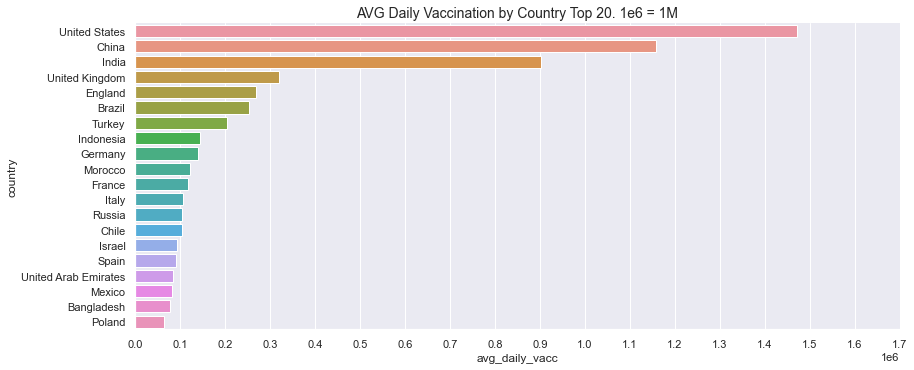

In [24]:
sns.catplot(y='country', x='avg_daily_vacc',
            data=avg_daily_vac_by_country_top20, kind='bar', height=5, aspect=2.5)
plt.title('AVG Daily Vaccination by Country Top 20. 1e6 = 1M', fontsize=14);
plt.xticks(list(np.arange(0,1700001,100000)));

Let's check for the numbr of fully vaccinated people in the top 20 countries.

In [25]:
top20_full_vac = top_20_countries.groupby('country')['people_fully_vaccinated'].max().reset_index()
top20_full_vac.sort_values(by='people_fully_vaccinated',inplace=True, ascending=False)
top20_full_vac

,country,people_fully_vaccinated
19,United States,62392065.0
7,India,10833617.0
16,Turkey,7197068.0
18,United Kingdom,5432126.0
9,Israel,4861451.0
0,Brazil,4832020.0
14,Russia,4638702.0
4,England,4344251.0
6,Germany,4334150.0
2,Chile,4042671.0


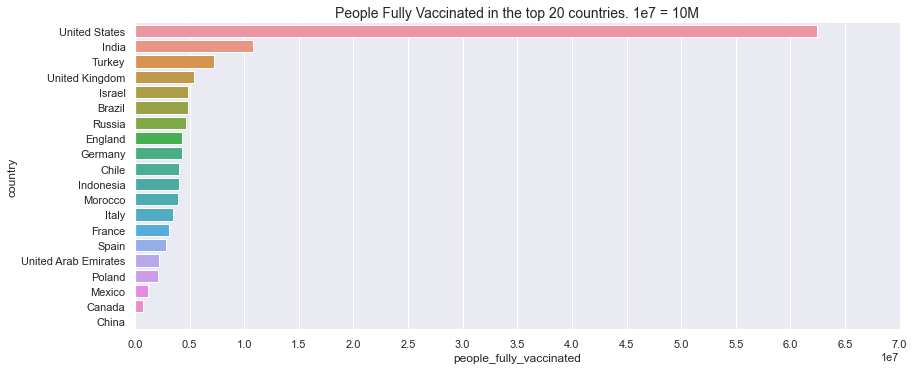

In [26]:
sns.catplot(y='country', x='people_fully_vaccinated', data=top20_full_vac,
           height=5, aspect=2.5, kind='bar')
plt.title('People Fully Vaccinated in the top 20 countries. 1e7 = 10M', fontsize=14)
plt.xticks(list(np.arange(0,70000001,5000000)));

Number of vaccinated people per million in the top 20 countries.

In [27]:
daily_per_million = top_20_countries.groupby('country')['daily_vaccinations_per_million'].mean().reset_index()
daily_per_million.sort_values(by='daily_vaccinations_per_million', inplace=True, ascending=False)
daily_per_million

,country,daily_vaccinations_per_million
9,Israel,10843.638889
17,United Arab Emirates,8567.428571
2,Chile,5438.689320
4,England,4784.778761
18,United Kingdom,4715.769912
19,United States,4399.140187
12,Morocco,3297.088235
16,Turkey,2429.036145
15,Spain,1957.445652
10,Italy,1770.350000


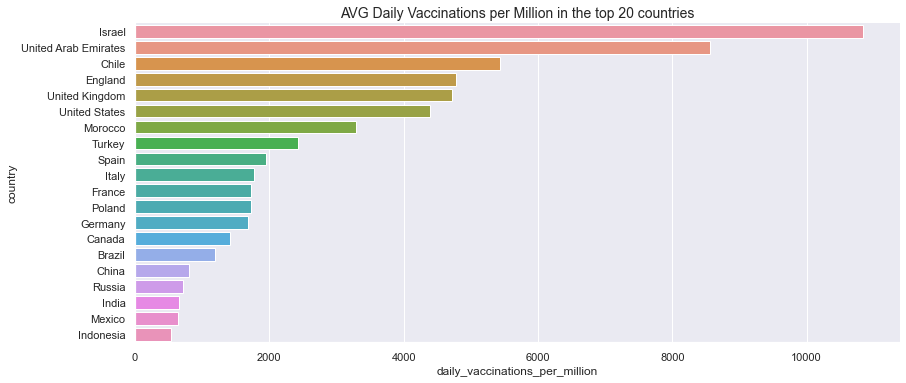

In [28]:
sns.catplot(y='country', x='daily_vaccinations_per_million', data=daily_per_million,
           height=5, aspect=2.5, kind='bar')
plt.title('AVG Daily Vaccinations per Million in the top 20 countries', fontsize=14);

In [29]:
# Top 5
daily_per_million[:5]

,country,daily_vaccinations_per_million
9,Israel,10843.638889
17,United Arab Emirates,8567.428571
2,Chile,5438.689320
4,England,4784.778761
18,United Kingdom,4715.769912


Which vaccines are being used by those 20 countries?

In [30]:
vaccines_by_country = df1[df1['country'].isin(list(total_vac_by_country_top20['country']))]

In [31]:
vaccines_by_country = vaccines_by_country.groupby(['country', 'vaccines']).size()

In [32]:
vaccines_by_country = pd.DataFrame(vaccines_by_country).reset_index()
vaccines_by_country

,country,vaccines,0
0,Brazil,"Oxford/AstraZeneca, Sinovac",80
1,Canada,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",113
2,Chile,"Pfizer/BioNTech, Sinovac",103
3,China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",112
4,England,"Oxford/AstraZeneca, Pfizer/BioNTech",113
5,France,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",99
6,Germany,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",97
7,India,"Covaxin, Oxford/AstraZeneca",81
8,Indonesia,"Oxford/AstraZeneca, Sinovac",83
9,Israel,"Moderna, Pfizer/BioNTech",108


Many countries use more than one vaccine. Let's find out which is the group of vaccines more frequent in the top 20 countries.

In [33]:
vaccines_by_country['vaccines'].value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          6
Oxford/AstraZeneca, Sinovac                                                           2
Pfizer/BioNTech, Sinovac                                                              2
Oxford/AstraZeneca, Pfizer/BioNTech                                                   2
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                               1
EpiVacCorona, Sputnik V                                                               1
Moderna, Pfizer/BioNTech                                                              1
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac                                           1
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V    1
Covaxin, Oxford/AstraZeneca                                                           1
Johnson&Johnson, Moderna, Pfizer/BioNTech                                             1
Oxford/AstraZeneca, Sinopharm/Be

## Which percentage of the population has been fully vaccinated in the top 20 countries?

In [34]:
path = 'top_20_pop.csv'
df2 = pd.read_csv(path)
df2

,country,people_fully_vaccinated,popuation
0,United States,62392065,328200000
1,India,10833617,1366000000
2,Turkey,7197068,82000000
3,United Kingdom,5432126,66270000
4,Israel,4861451,9053000
5,Brazil,4832020,211000000
6,Russia,4638702,144400000
7,England,4344251,55980000
8,Germany,4334150,83020000
9,Chile,4042671,18950000


In [35]:
df2['pct_of_population'] = round(df2['people_fully_vaccinated'] / df2['popuation'], 2)
df2 = df2.sort_values(by='pct_of_population', ascending=False)

In [36]:
df2

,country,people_fully_vaccinated,popuation,pct_of_population
4,Israel,4861451,9053000,0.54
15,United Arab Emirates,2187849,9771000,0.22
9,Chile,4042671,18950000,0.21
0,United States,62392065,328200000,0.19
11,Morocco,3951023,36470000,0.11
2,Turkey,7197068,82000000,0.09
3,United Kingdom,5432126,66270000,0.08
7,England,4344251,55980000,0.08
13,France,3109768,37970000,0.08
14,Spain,2852806,46940000,0.06
